# Figure plotting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import concat_tables, visualize

### Mean f1 and cv-f1 scores for segmented prose corpus

In [2]:
table = concat_tables("../data/tables/", "seg_prose")

In [3]:
table2 = table
table2["clf"] = table2["clf"].str.split(pat=":", expand=True)#[0]#(":")[0]#[:4]

In [4]:
table3 = table2.groupby(["clf"]).sum(axis=1)

In [5]:
table4 = table3.div(6)
table4

,f1,cv
clf,,
KNN,0.875167,0.867333
LR,0.998000,0.996167
LSVM,0.998500,0.997833
MNB,0.977500,0.974000
NSC,0.779000,0.777000
tKNN,0.987333,0.986000
tLR,0.997667,0.996667
tLSVM,0.998333,0.998000
tMNB,0.978000,0.975500


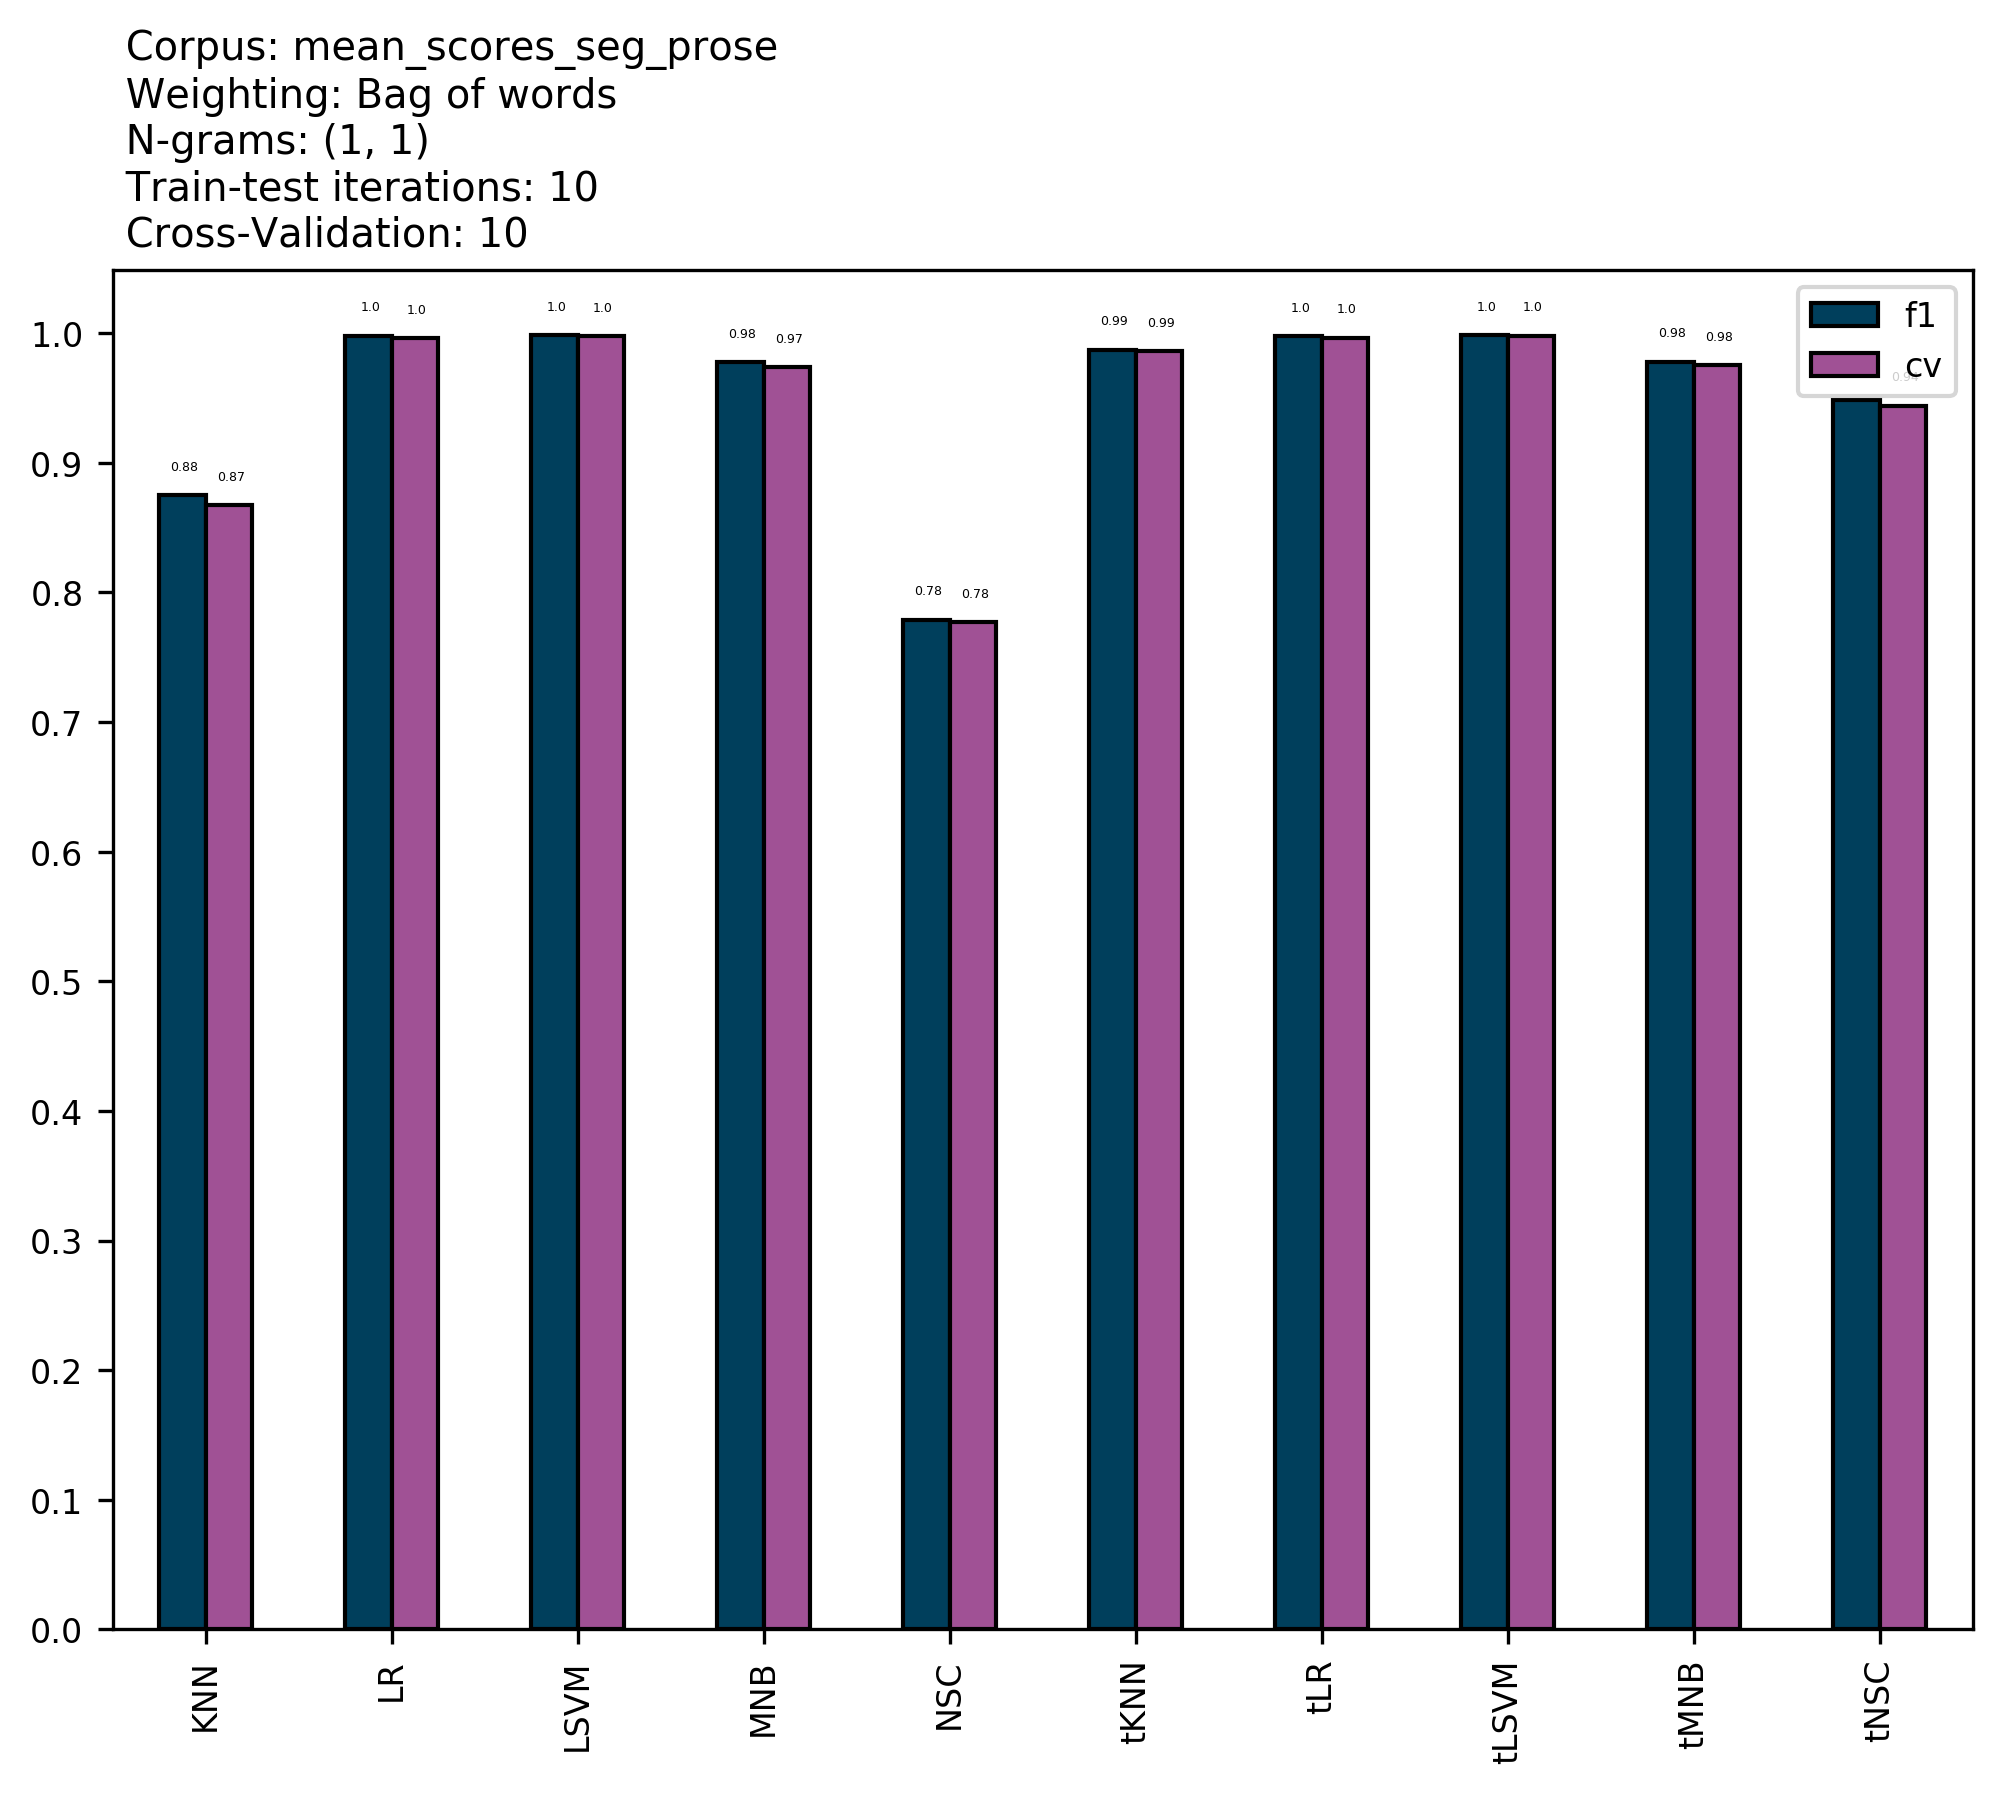

In [8]:
visualize(table4, 
          "bar_vertical", 
          classruns=10, 
          cross_validation=10,
          output_name="mean_scores_seg_prose",
          vectorization_method="bow")